In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

# Predicting building demolition risk in Philadelphia, 2015-2021

## Introduction and Literature Review


## Presentation of Data
### Data collection

In [2]:
#Get data on private demolitions post-2015 from API
demolitions = pd.read_csv("https://phl.carto.com/api/v2/sql?format=CSV&q=SELECT%20*%20FROM%20demolitions%20WHERE%20city_demo%20=%20%27NO%27%20AND%20start_date%20>=%20%272015-01-01%27")

In [3]:
demolitions.columns

Index(['the_geom', 'cartodb_id', 'the_geom_webmercator', 'objectid',
       'addressobjectid', 'parcel_id_num', 'opa_account_num', 'address',
       'unit_type', 'unit_num', 'zip', 'censustract', 'opa_owner',
       'caseorpermitnumber', 'record_type', 'typeofwork',
       'typeofworkdescription', 'city_demo', 'start_date', 'completed_date',
       'status', 'applicanttype', 'applicantname', 'contractorname',
       'contractortype', 'contractoraddress1', 'contractoraddress2',
       'contractorcity', 'contractorstate', 'contractorzip', 'mostrecentinsp',
       'systemofrecord', 'geocode_x', 'geocode_y'],
      dtype='object')

In [4]:
demolitions.drop(index=demolitions[demolitions['typeofwork'] == 'TANKRI'].index, inplace=True) #drop tank removals

In [5]:
datecols = ['start_date', 'completed_date']

for c in datecols:
    demolitions[c] = pd.to_datetime(demolitions[c])

In [6]:
demolitions.shape

(2331, 34)

In [7]:
#Get 2015 market value for each parcel (earliest year available)
value15 = pd.read_csv('https://phl.carto.com/api/v2/sql?format=CSV&q=SELECT%20parcel_number,%20market_value%20FROM%20assessments%20WHERE%20year%20=%202016',
                     dtype={'parcel_number': 'object', 'market_value': 'float64'})

In [8]:
value15.head()

,parcel_number,market_value
0,NaN,0.0
1,011000600,127300.0
2,011000700,180400.0
3,011000800,179700.0
4,011000900,202000.0


In [9]:
value15.shape

(582115, 2)

In [14]:
#Get selected features of each property (as gdf to allow for spatial queries)
properties = gpd.read_file('https://phl.carto.com/api/v2/sql?format=geojson&q=SELECT%20the_geom,%20location,%20year_built,%20parcel_number,%20category_code_description,%20total_area,%20census_tract,%20interior_condition,%20exterior_condition%20FROM%20opa_properties_public%20WHERE%20category_code_description%20!=%20%27Vacant%20Land%27')

KeyboardInterrupt: 

In [11]:
properties.head()

,location,year_built,parcel_number,category_code_description,total_area,census_tract,interior_condition,exterior_condition,geometry
0,232 REED ST,1920,011012800,Single Family,834.60,27,3,3,POINT (-75.14918 39.93030)
1,234 REED ST,1920,011012900,Single Family,842.40,27,3,3,POINT (-75.14923 39.93032)
2,236 REED ST,1920,011013000,Single Family,739.68,27,2,2,POINT (-75.14927 39.93033)
3,238 REED ST,1920,011013100,Single Family,675.84,27,2,2,POINT (-75.14932 39.93034)
4,240 REED ST,1920,011013200,Single Family,672.00,27,4,4,POINT (-75.14937 39.93034)


In [12]:
#Merge property 
properties = pd.merge(properties, value15, how='left', on='parcel_number')

In [ ]:
del(value15) #save memory

In [16]:
properties.shape

(536877, 11)

In [13]:
#Add field encoding whether property address appears in demolition dataset (0 for no, 1 for yes)
properties['demolition'] = properties['location'].isin(demolitions['address']).astype(np.int8)

In [ ]:
del(demolitions) #save memory

In [15]:
properties.groupby(['category_code_description', 'demolition']).size()

category_code_description  demolition
Commercial                 0              13857
                           1                205
Industrial                 0               4264
                           1                 93
Mixed Use                  0              14305
                           1                 91
Multi Family               0              42115
                           1                353
Single Family              0             460550
                           1               1044
dtype: int64

<AxesSubplot:>

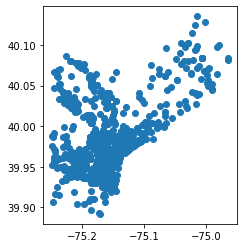

In [19]:
properties.loc[
    properties['demolition'] == 1
][['']]

In [ ]:
#Get Census data from API (ACS 5-year estimates from 2010 to 2015)

In [ ]:
#Join Census tract data to each property

In [ ]:
#Add field encoding distance from each property to City Hall

In [ ]:
#Import public transportation shapefiles

##Trolley stops (within Philadelphia county)

##MFL stops

##BSL stops

##Regional Rail stops (within Philadelphia County)

##Concatenate transportation stops into one gdf of all transportation stops

#Add field encoding distance from each property to closest transportation stop


### Data cleaning

In [ ]:
#Check for columns where most values are null, then drop

In [ ]:
#Check rows where most values are null, then drop

In [ ]:
#Convert categorical features into dummies using sklearn DictVectorizer

### Summary statistics

In [ ]:
#Correlation matrix

In [2]:
#Histograms of continuous variables

## Methodology

In [4]:
#Write function to tune hyperparameters for each classifier with GridSearchCV

### Random Forest classifier

In [ ]:
#Tune hyperparameters using GridSearchCV

### k-Nearest Neighbours classifier

In [ ]:
#Tune hyperparameters using GridSearchCV

## Results and Discussion

In [3]:
#Metrics for each classifier (table)

In [ ]:
#Confusion matrix for each classifier (figure)

In [ ]:
#Map of false positives for each classifier

In [ ]:
#Map of false negatives for each classifier

## Conclusion

## References